# Inferential Visualizations

>1.[World 1- Magma Peak](#World-1-Magma-Peak)<br>
>2.[World 2- TreeTop City](#World-2-TreeTop-City)<br>
>3.[World 3- Crystal Caves](#World-3-Crystal-Caves)<br>

# World 1 Magma Peak

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import  LassoCV, RidgeCV,ElasticNet, ElasticNetCV,LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', -1) 

In [3]:
df_mp=pd.read_csv('../data/magmapeak_final.csv')

In [4]:
df_mp.head()

,installation_id,Bottle Filler (Activity),Bubble Bath,Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity),Cauldron Filler (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
0,0006c192,6.600,1.61,2.53,0.00,2,2,1.887,2.71,0,0.36,0.24,1,0,1.0,3
1,002db7e3,8.240,4.32,4.03,3.49,2,3,0.717,2.51,0,1.57,0.57,1,0,1.0,3
2,003372b0,2.460,2.61,2.60,3.31,1,1,1.220,0.49,0,0.07,0.60,1,0,1.0,3
3,004c2091,1.197,0.00,0.00,0.00,1,2,0.000,0.00,0,0.12,0.30,1,0,1.0,3
4,00634433,0.000,0.00,0.00,0.00,1,1,0.000,0.00,0,0.00,1.13,1,0,1.0,3


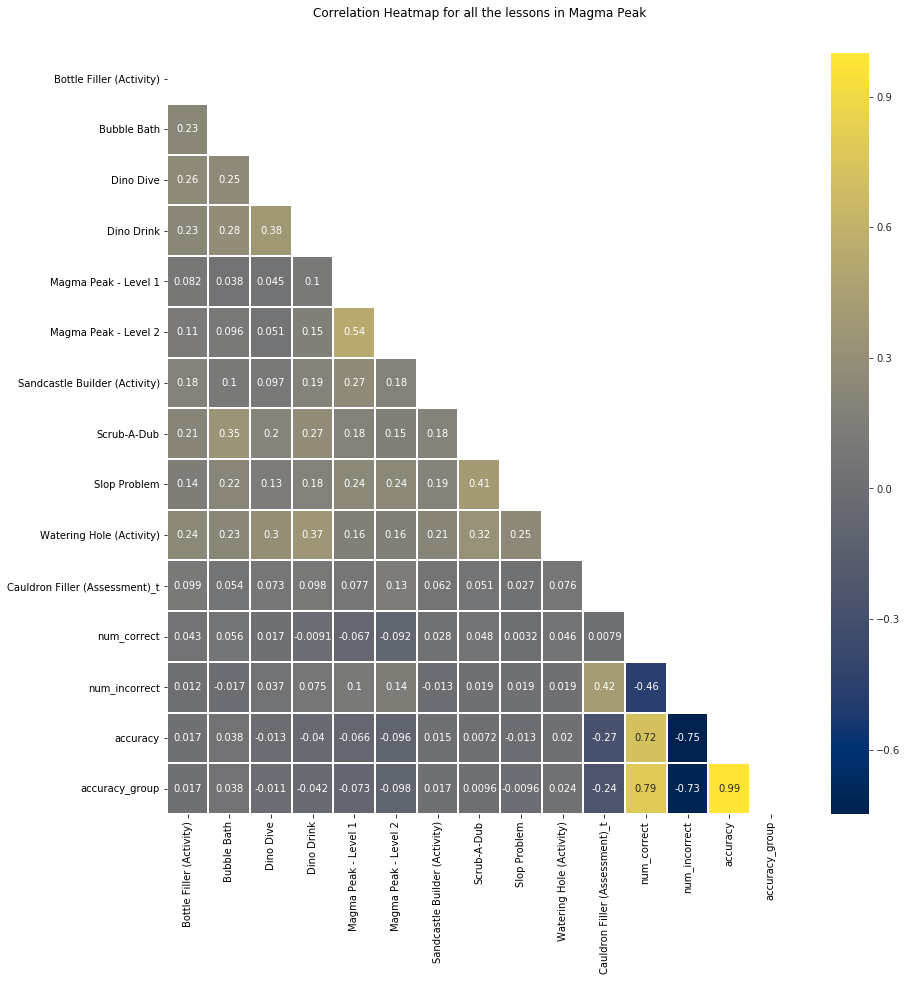

In [5]:

#Seaborn Heatmap visualizes correlation between all numeric features
fig = plt.figure(figsize=(14,14))
ax = plt.axes()
ax.set_title('Correlation Heatmap for all the lessons in Magma Peak\n\n');

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(df_mp.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(df_mp.corr(),annot=True,cmap='cividis',linecolor='white',linewidth=1,mask=mask)

In [6]:
df_mp['accuracy_group'].value_counts()

3    1179
2    271 
0    204 
1    181 
Name: accuracy_group, dtype: int64

In [7]:
df_mp.loc[(df_mp['accuracy_group']==2)|(df_mp['accuracy_group']==1)|(df_mp['accuracy_group']==3),'accuracy_group']=1

In [8]:
df_mp['accuracy_group'].value_counts()

1    1631
0    204 
Name: accuracy_group, dtype: int64

In [9]:
# df_mp.loc[(df_mp['accuracy_group']==3),'accuracy_group']=1

# Logistic Regression

In [10]:
df_mp.columns

Index(['installation_id', 'Bottle Filler (Activity)', 'Bubble Bath',
       'Dino Dive', 'Dino Drink', 'Magma Peak - Level 1',
       'Magma Peak - Level 2', 'Sandcastle Builder (Activity)', 'Scrub-A-Dub',
       'Slop Problem', 'Watering Hole (Activity)',
       'Cauldron Filler (Assessment)_t', 'num_correct', 'num_incorrect',
       'accuracy', 'accuracy_group'],
      dtype='object')

In [11]:
feature=[ 'Bottle Filler (Activity)', 'Bubble Bath',
       'Dino Dive', 'Dino Drink', 
       'Sandcastle Builder (Activity)', 'Scrub-A-Dub',
       'Slop Problem', 'Watering Hole (Activity)']

In [12]:
# define x and y
X = df_mp[feature]
y = df_mp['accuracy_group']

In [13]:
y.value_counts(normalize=True)

1    0.888828
0    0.111172
Name: accuracy_group, dtype: float64

In [14]:
# split test and train set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.10,
                                                    stratify=y)
print(X_train.shape)
print(X_test.shape)

(1651, 8)
(184, 8)


In [15]:
#fitting a `StandardScaler` to `X_train` and use it to transform both `X_train` and `X_test`

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [16]:
# Instantiating  model.
logreg_mp = LogisticRegression()

In [17]:
# Fitting model.
logreg_mp.fit(X_train_sc, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print(f'Logistic Regression Intercept: {np.exp(logreg_mp.intercept_)}')
print(f'Logistic Regression Coefficient: {np.exp(logreg_mp.coef_)}')

Logistic Regression Intercept: [8.21758328]
Logistic Regression Coefficient: [[1.05122389 1.17011182 0.9953433  0.82744281 1.16408573 1.17757009
  0.87298217 1.11687057]]


In [19]:
#Function to make matplot look better

def drawplot(series,x,title):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    plt.rcParams['text.color']='#333F4B'

# create some fake data
    percentages = series 
                        
    df = pd.DataFrame({'percentage' : percentages})
    df = df.sort_values(by='percentage')

# we first need a numeric placeholder for the y axis
    my_range=list(range(1,len(df.index)+1))

    fig, ax = plt.subplots(figsize=(8,5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
    plt.hlines(y=my_range, xmin=0, xmax=df['percentage'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
    plt.plot(df['percentage'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
    ax.set_xlabel(x, fontsize=15, fontweight='black', color = '#333F4B')
    ax.set_ylabel('')

# set axis
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
    fig.text(0.3, 0.96, title, fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
    ax.spines['bottom'].set_position(('axes', -0.04))
    ax.spines['left'].set_position(('axes', 0.015))


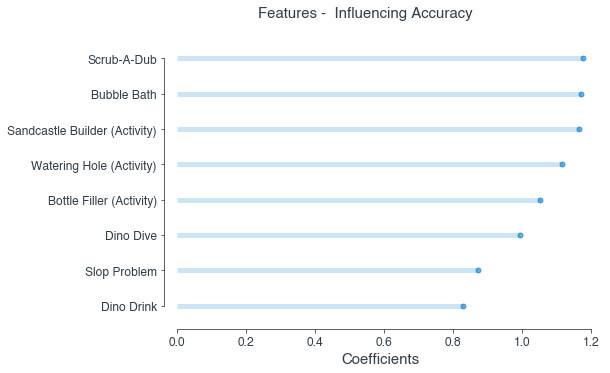

In [20]:
drawplot(pd.Series(np.exp(logreg_mp.coef_)[0],index=feature),'Coefficients','Features -  Influencing Accuracy')

In [21]:
df_mp.head()

,installation_id,Bottle Filler (Activity),Bubble Bath,Dino Dive,Dino Drink,Magma Peak - Level 1,Magma Peak - Level 2,Sandcastle Builder (Activity),Scrub-A-Dub,Slop Problem,Watering Hole (Activity),Cauldron Filler (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group
0,0006c192,6.600,1.61,2.53,0.00,2,2,1.887,2.71,0,0.36,0.24,1,0,1.0,1
1,002db7e3,8.240,4.32,4.03,3.49,2,3,0.717,2.51,0,1.57,0.57,1,0,1.0,1
2,003372b0,2.460,2.61,2.60,3.31,1,1,1.220,0.49,0,0.07,0.60,1,0,1.0,1
3,004c2091,1.197,0.00,0.00,0.00,1,2,0.000,0.00,0,0.12,0.30,1,0,1.0,1
4,00634433,0.000,0.00,0.00,0.00,1,1,0.000,0.00,0,0.00,1.13,1,0,1.0,1


In [22]:
df_mp.drop(columns=['num_correct','num_incorrect','accuracy','Magma Peak - Level 1','Magma Peak - Level 2'],inplace=True)

In [23]:
df_mp.shape

(1835, 11)

In [24]:
#popular Games
perct_mp=[]
for i in df_mp.columns:
    
    if (i!='installation_id')&(i!='accuracy_group')&(i!='Cauldron Filler (Assessment)_t'):
        perct=round((len(df_mp[df_mp[i]>0])/1835)*100,2)
        perct_mp.append(perct)
        print(f"{i}-{perct}")
        

Bottle Filler (Activity)-65.78
Bubble Bath-44.96
Dino Dive-52.75
Dino Drink-49.1
Sandcastle Builder (Activity)-63.98
Scrub-A-Dub-48.01
Slop Problem-40.16
Watering Hole (Activity)-51.55


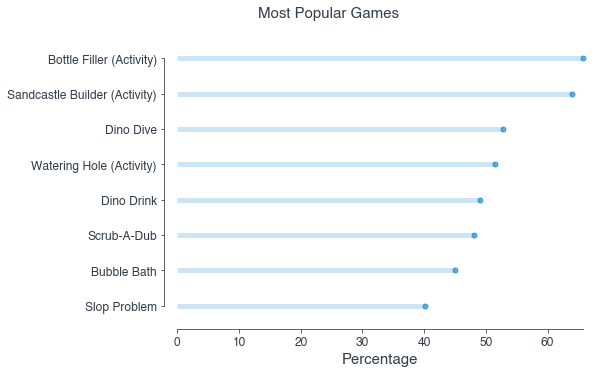

In [25]:
drawplot(pd.Series(perct_mp,index=feature),'Percentage','Most Popular Games')

In [26]:
played=[]
notplayed=[]
for i in df_mp.columns:
    #print(i)
    if (i!='installation_id')&(i!='accuracy_group')&(i!='Cauldron Filler (Assessment)_t'):
        print(i)
        
        fail_p=len(df_mp[(df_mp[i]>0)&(df_mp['accuracy_group']==0)])
        pass_p=len(df_mp[(df_mp[i]>0)&(df_mp['accuracy_group']==1)])
        #print(fail_p,pass_p)
        pass_perct_p=round((pass_p/1835)*100,2)
        print('played '+str(pass_perct_p))
        played.append(pass_perct_p)
        
        #print('Not played')
        fail_np=len(df_mp[(df_mp[i]==0)&(df_mp['accuracy_group']==0)])
        pass_np=len(df_mp[(df_mp[i]==0)&(df_mp['accuracy_group']==1)])
        #print(fail_np,pass_np)
        pass_perct_np=round((pass_np/1835)*100,2)
        print('Not played '+str(pass_perct_np)+'\n')
        notplayed.append(pass_perct_np)
        

Bottle Filler (Activity)
played 59.51
Not played 29.37

Bubble Bath
played 40.49
Not played 48.39

Dino Dive
played 47.03
Not played 41.85

Dino Drink
played 43.81
Not played 45.07

Sandcastle Builder (Activity)
played 57.55
Not played 31.34

Scrub-A-Dub
played 42.94
Not played 45.94

Slop Problem
played 35.42
Not played 53.46

Watering Hole (Activity)
played 46.27
Not played 42.62



In [27]:
def drawplot2(x,y):
    plt.figure(figsize=(10,6))

# set width of bar
    barWidth = 0.25
    f=-0.30 
# set height of bar
    bars1 = x
    bars2 = y


 
    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Played and completed')
    plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Not Played and completed')

    plt.title('Users who completed the assessment\n')
 
    # Add xticks on the middle of the group bars
    #plt.xlabel('group', fontweight='bold')
    plt.xticks([r + f for r in range(len(bars1))],feature,rotation=50)
    plt.ylabel('percentage')
    # Create legend & Show graphic
    plt.legend()
    plt.show()

    


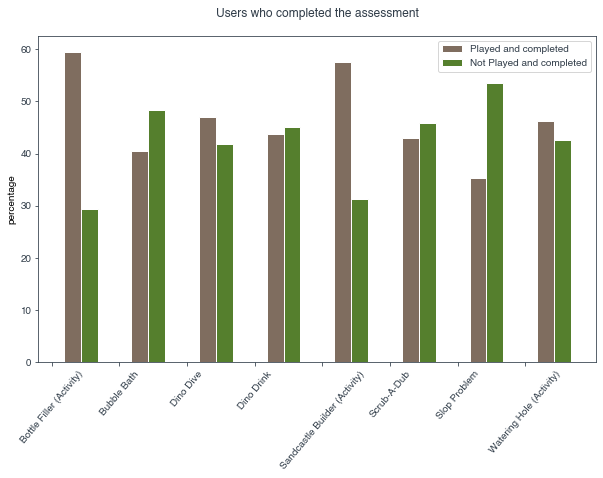

In [28]:
drawplot2(played,notplayed)

# World 2 TreeTop City

In [29]:
df_tt=pd.read_csv('../data/treetopcity_final.csv')

In [30]:
df_tt.head()

,installation_id,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Mushroom Sorter (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group,Bird Measurer (Assessment)_t
0,0006a69f,1,3.22,0.917,1.75,2,1.31,1.53,2.74,1,1,1,1,1,1,1,0.66,0,11,0.000,0,0.0
1,0006c192,1,0.00,0.000,1.32,0,0.20,0.00,4.46,1,1,3,1,3,1,1,1.53,1,1,0.500,2,0.0
2,001d0ed0,0,0.00,0.000,0.00,0,0.00,0.00,0.00,2,1,2,1,1,1,1,1.38,0,5,0.000,0,0.0
3,002db7e3,0,3.11,1.240,1.33,0,0.00,0.60,0.71,1,0,0,0,2,2,2,0.87,1,10,0.091,1,0.0
4,003372b0,2,2.75,1.280,1.20,1,3.32,1.43,0.79,2,1,1,2,1,1,1,0.58,1,1,0.500,2,0.0


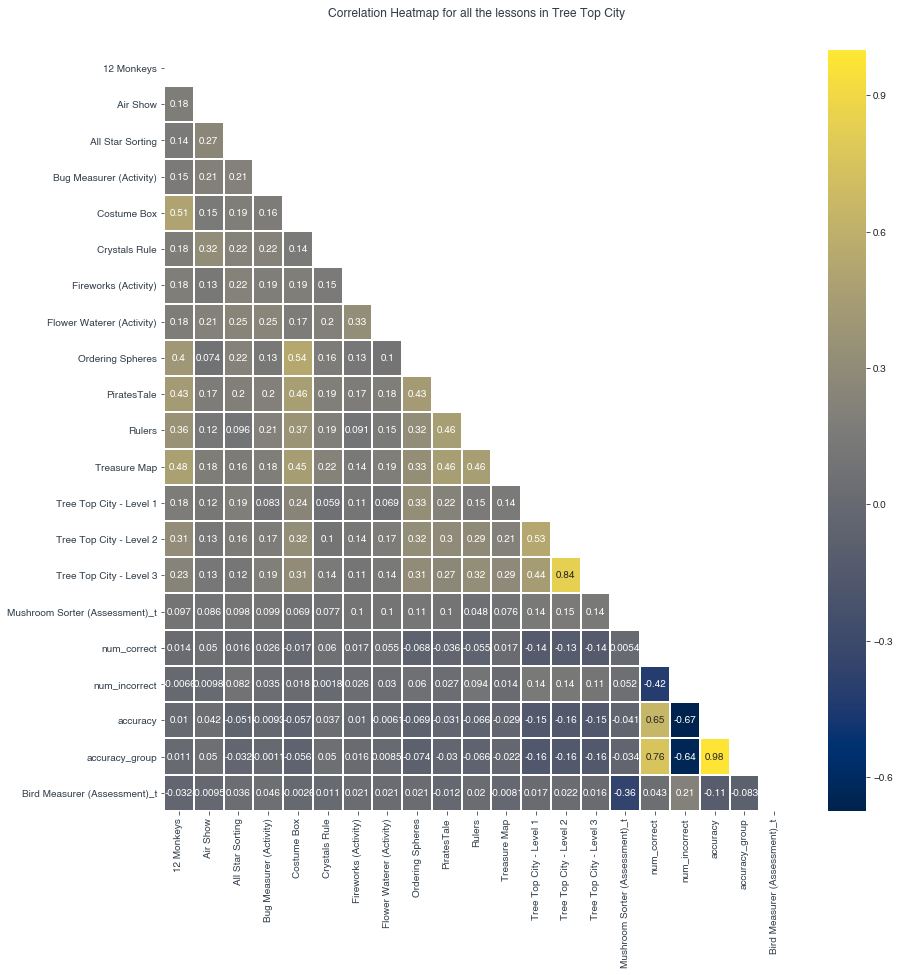

In [31]:

#Seaborn Heatmap visualizes correlation between all numeric features
fig = plt.figure(figsize=(14,14))
ax = plt.axes()
ax.set_title('Correlation Heatmap for all the lessons in Tree Top City\n\n');

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(df_tt.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(df_tt.corr(),annot=True,cmap='cividis',linecolor='white',linewidth=1,mask=mask)

In [32]:
df_tt['accuracy_group'].value_counts()

1    808
0    724
3    697
2    438
Name: accuracy_group, dtype: int64

In [33]:
df_tt.loc[(df_tt['accuracy_group']==2)|(df_tt['accuracy_group']==1)|(df_tt['accuracy_group']==3),'accuracy_group']=1

In [34]:
df_tt['accuracy_group'].value_counts()

1    1943
0    724 
Name: accuracy_group, dtype: int64

In [35]:
df_tt.columns

Index(['installation_id', '12 Monkeys', 'Air Show', 'All Star Sorting',
       'Bug Measurer (Activity)', 'Costume Box', 'Crystals Rule',
       'Fireworks (Activity)', 'Flower Waterer (Activity)', 'Ordering Spheres',
       'PiratesTale', 'Rulers', 'Treasure Map', 'Tree Top City - Level 1',
       'Tree Top City - Level 2', 'Tree Top City - Level 3',
       'Mushroom Sorter (Assessment)_t', 'num_correct', 'num_incorrect',
       'accuracy', 'accuracy_group', 'Bird Measurer (Assessment)_t'],
      dtype='object')

In [36]:
feature=['12 Monkeys', 'Air Show', 'All Star Sorting',
       'Bug Measurer (Activity)', 'Costume Box', 'Crystals Rule',
       'Fireworks (Activity)', 'Flower Waterer (Activity)', 'Ordering Spheres',
       'PiratesTale', 'Rulers', 'Treasure Map']

In [37]:
# define x and y
X = df_tt[feature]
y = df_tt['accuracy_group']

In [38]:
# split test and train set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.10,
                                                    stratify=y)
print(X_train.shape)
print(X_test.shape)

(2400, 12)
(267, 12)


In [39]:
#fitting a `StandardScaler` to `X_train` and use it to transform both `X_train` and `X_test`

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [40]:
# Instantiating  model.
logreg_tt = LogisticRegression()

In [41]:
# Fitting model.
logreg_tt.fit(X_train_sc, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
print(f'Logistic Regression Intercept: {np.exp(logreg_tt.intercept_)}')
print(f'Logistic Regression Coefficient: {np.exp(logreg_tt.coef_)}')

Logistic Regression Intercept: [2.72543151]
Logistic Regression Coefficient: [[1.0566602  1.08833736 1.01442514 1.00373205 1.01680233 1.10326499
  0.97842114 1.1503787  0.85326521 0.9411887  0.85908739 1.0806654 ]]


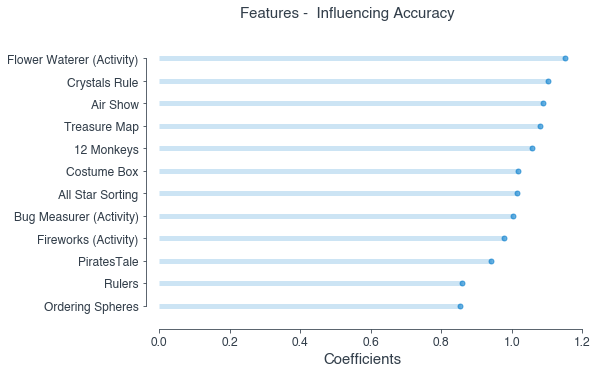

In [43]:
drawplot(pd.Series(np.exp(logreg_tt.coef_)[0],index=feature),'Coefficients','Features -  Influencing Accuracy')

In [44]:
df_tt.head()

,installation_id,12 Monkeys,Air Show,All Star Sorting,Bug Measurer (Activity),Costume Box,Crystals Rule,Fireworks (Activity),Flower Waterer (Activity),Ordering Spheres,PiratesTale,Rulers,Treasure Map,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Mushroom Sorter (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group,Bird Measurer (Assessment)_t
0,0006a69f,1,3.22,0.917,1.75,2,1.31,1.53,2.74,1,1,1,1,1,1,1,0.66,0,11,0.000,0,0.0
1,0006c192,1,0.00,0.000,1.32,0,0.20,0.00,4.46,1,1,3,1,3,1,1,1.53,1,1,0.500,1,0.0
2,001d0ed0,0,0.00,0.000,0.00,0,0.00,0.00,0.00,2,1,2,1,1,1,1,1.38,0,5,0.000,0,0.0
3,002db7e3,0,3.11,1.240,1.33,0,0.00,0.60,0.71,1,0,0,0,2,2,2,0.87,1,10,0.091,1,0.0
4,003372b0,2,2.75,1.280,1.20,1,3.32,1.43,0.79,2,1,1,2,1,1,1,0.58,1,1,0.500,1,0.0


In [45]:
df_tt.drop(columns=['num_correct','num_incorrect','accuracy','Tree Top City - Level 1','Tree Top City - Level 2','Tree Top City - Level 3'],inplace=True)

In [46]:
#popular Games
perct_tt=[]

for i in df_tt.columns:
    if (i!='installation_id')&(i!='accuracy_group')&(i!='Mushroom Sorter (Assessment)_t')&(i!='Bird Measurer (Assessment)_t'):
        perct=round((len(df_tt[df_tt[i]>0])/df_tt.shape[0])*100,2)
        perct_tt.append(perct)
        print(f"{i}-{perct}")
        

12 Monkeys-41.81
Air Show-56.13
All Star Sorting-56.36
Bug Measurer (Activity)-64.42
Costume Box-37.61
Crystals Rule-53.66
Fireworks (Activity)-66.18
Flower Waterer (Activity)-57.11
Ordering Spheres-48.41
PiratesTale-42.78
Rulers-40.79
Treasure Map-36.82


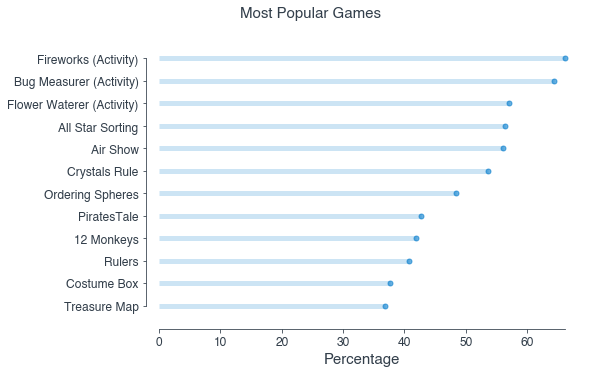

In [47]:
drawplot(pd.Series(perct_tt,index=feature),'Percentage','Most Popular Games')

In [48]:
played=[]
notplayed=[]
for i in df_tt.columns:
    #print(i)
    if (i!='installation_id')&(i!='accuracy_group')&(i!='Mushroom Sorter (Assessment)_t')&(i!='Bird Measurer (Assessment)_t'):
        print(i)
        
        fail_p=len(df_tt[(df_tt[i]>0)&(df_tt['accuracy_group']==0)])
        pass_p=len(df_tt[(df_tt[i]>0)&(df_tt['accuracy_group']==1)])
        #print(fail_p,pass_p)
        pass_perct_p=round((pass_p/(df_tt.shape[0]))*100,2)
        played.append(pass_perct_p)
        print('played '+str(pass_perct_p))
        #print('Not played')
        fail_np=len(df_tt[(df_tt[i]==0)&(df_tt['accuracy_group']==0)])
        pass_np=len(df_tt[(df_tt[i]==0)&(df_tt['accuracy_group']==1)])
        #print(fail_np,pass_np)
        pass_perct_np=round((pass_np/(df_tt.shape[0]))*100,2)
        notplayed.append(pass_perct_np)
        print('Not played '+str(pass_perct_np)+'\n')

12 Monkeys
played 30.48
Not played 42.37

Air Show
played 41.88
Not played 30.97

All Star Sorting
played 42.11
Not played 30.75

Bug Measurer (Activity)
played 48.22
Not played 24.63

Costume Box
played 27.67
Not played 45.18

Crystals Rule
played 40.23
Not played 32.62

Fireworks (Activity)
played 48.78
Not played 24.07

Flower Waterer (Activity)
played 43.27
Not played 29.58

Ordering Spheres
played 35.55
Not played 37.31

PiratesTale
played 30.82
Not played 42.03

Rulers
played 28.8
Not played 44.06

Treasure Map
played 27.6
Not played 45.26



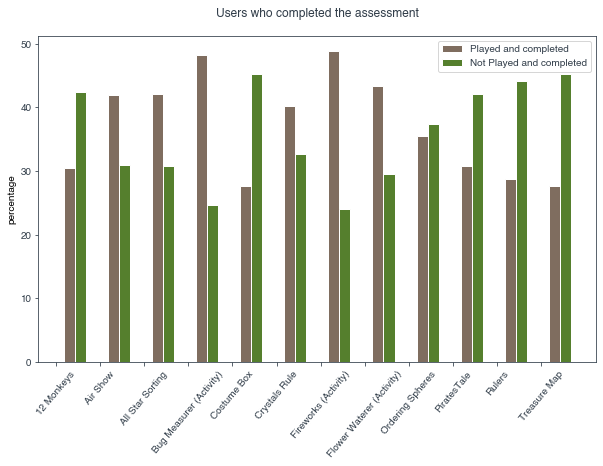

In [49]:
drawplot2(played,notplayed)

# World 3 Crystal Caves

In [50]:
df_cc=pd.read_csv('../data/crystalcaves_final.csv')

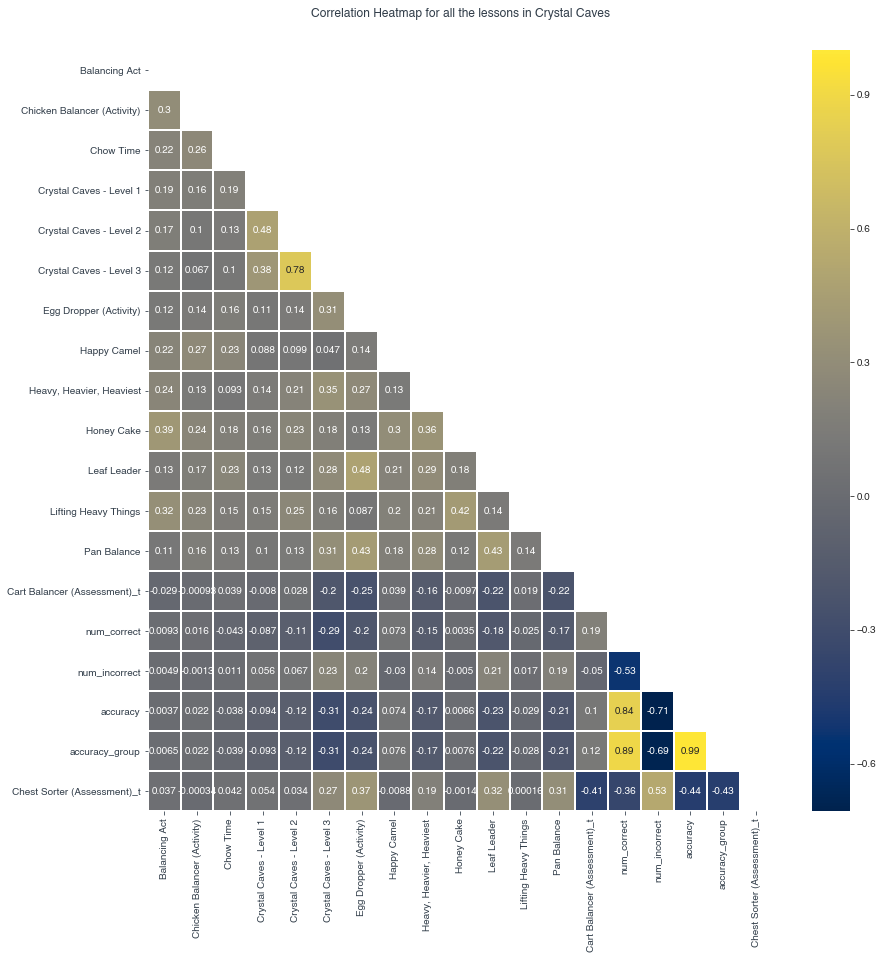

In [51]:

#Seaborn Heatmap visualizes correlation between all numeric features
fig = plt.figure(figsize=(14,14))
ax = plt.axes()
ax.set_title('Correlation Heatmap for all the lessons in Crystal Caves\n\n');

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(df_cc.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(df_cc.corr(),annot=True,cmap='cividis',linecolor='white',linewidth=1,mask=mask)

In [52]:
df_cc['accuracy_group'].value_counts()

3    1556
0    1314
1    407 
2    338 
Name: accuracy_group, dtype: int64

In [53]:
df_cc.loc[(df_cc['accuracy_group']==2)|(df_cc['accuracy_group']==1)|(df_cc['accuracy_group']==3),'accuracy_group']=1

In [54]:
df_cc['accuracy_group'].value_counts()

1    2301
0    1314
Name: accuracy_group, dtype: int64

In [55]:
df_cc.columns

Index(['installation_id', 'Balancing Act', 'Chicken Balancer (Activity)',
       'Chow Time', 'Crystal Caves - Level 1', 'Crystal Caves - Level 2',
       'Crystal Caves - Level 3', 'Egg Dropper (Activity)', 'Happy Camel',
       'Heavy, Heavier, Heaviest', 'Honey Cake', 'Leaf Leader',
       'Lifting Heavy Things', 'Pan Balance', 'Cart Balancer (Assessment)_t',
       'num_correct', 'num_incorrect', 'accuracy', 'accuracy_group',
       'Chest Sorter (Assessment)_t'],
      dtype='object')

In [56]:
feature=[ 'Balancing Act', 'Chicken Balancer (Activity)','Chow Time', 
        'Egg Dropper (Activity)', 'Happy Camel',
       'Heavy, Heavier, Heaviest', 'Honey Cake', 'Leaf Leader',
       'Lifting Heavy Things', 'Pan Balance']

In [57]:
# define x and y
X = df_cc[feature]
y = df_cc['accuracy_group']

In [58]:
# split test and train set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.10,
                                                    stratify=y)
print(X_train.shape)
print(X_test.shape)

(3253, 10)
(362, 10)


In [59]:
#fitting a `StandardScaler` to `X_train` and use it to transform both `X_train` and `X_test`

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [60]:
# Instantiating  model.
logreg_cc = LogisticRegression()

In [61]:
# Fitting model.
logreg_cc.fit(X_train_sc, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
print(f'Logistic Regression Intercept: {np.exp(logreg_cc.intercept_)}')
print(f'Logistic Regression Coefficient: {np.exp(logreg_cc.coef_)}')

Logistic Regression Intercept: [1.81351417]
Logistic Regression Coefficient: [[1.05672735 1.10377851 0.931898   0.78653112 1.36087465 0.79752844
  1.07928522 0.80274232 0.98770597 0.84282847]]


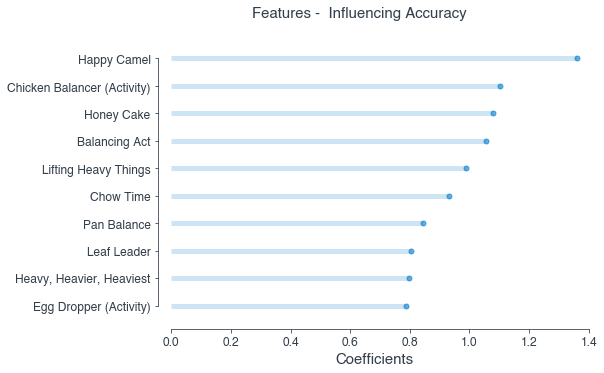

In [63]:
drawplot(pd.Series(np.exp(logreg_cc.coef_)[0],index=feature),'Coefficients','Features -  Influencing Accuracy')

In [64]:
df_cc.head()

,installation_id,Balancing Act,Chicken Balancer (Activity),Chow Time,Crystal Caves - Level 1,Crystal Caves - Level 2,Crystal Caves - Level 3,Egg Dropper (Activity),Happy Camel,"Heavy, Heavier, Heaviest",Honey Cake,Leaf Leader,Lifting Heavy Things,Pan Balance,Cart Balancer (Assessment)_t,num_correct,num_incorrect,accuracy,accuracy_group,Chest Sorter (Assessment)_t
0,001d0ed0,1,0.00,1.25,1,1,0,0.0,0.98,0,2,0.0,2,0.00,0.35,1,0,1.0,1,0.0
1,002db7e3,0,3.28,4.45,2,2,1,0.0,1.01,0,1,0.0,2,1.89,0.71,1,0,1.0,1,0.0
2,003372b0,1,1.49,3.02,1,1,0,0.0,2.47,0,2,0.0,4,0.00,0.50,1,0,1.0,1,0.0
3,00634433,0,0.00,2.54,1,2,0,0.0,0.00,0,0,0.0,0,0.00,0.51,1,0,1.0,1,0.0
4,00667b88,0,0.00,0.00,3,4,3,0.0,0.00,0,0,0.0,0,0.00,1.11,1,0,1.0,1,0.0


In [65]:
df_cc.drop(columns=['num_correct','num_incorrect','accuracy','Crystal Caves - Level 1','Crystal Caves - Level 2','Crystal Caves - Level 3'],inplace=True)

In [66]:
#popular Games
perct_cc=[]
for i in df_cc.columns:
    if (i!='installation_id')&(i!='accuracy_group')&(i!='Cart Balancer (Assessment)_t')&(i!='Chest Sorter (Assessment)_t'):
        perct=round((len(df_cc[df_cc[i]>0])/df_cc.shape[0])*100,2)
        perct_cc.append(perct)
        print(f"{i}-{perct}")

Balancing Act-40.94
Chicken Balancer (Activity)-44.7
Chow Time-58.95
Egg Dropper (Activity)-31.4
Happy Camel-50.1
Heavy, Heavier, Heaviest-18.15
Honey Cake-34.91
Leaf Leader-25.09
Lifting Heavy Things-38.51
Pan Balance-27.88


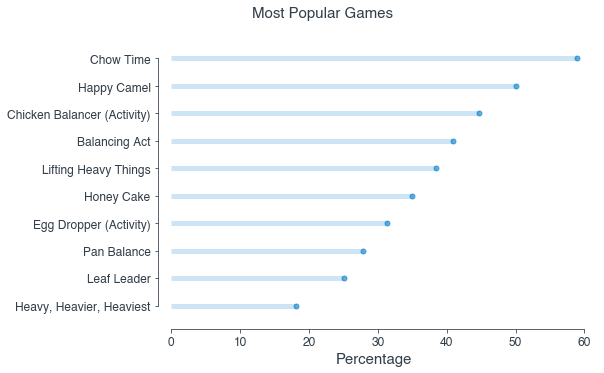

In [67]:
drawplot(pd.Series(perct_cc,index=feature),'Percentage','Most Popular Games')

In [68]:
played=[]
notplayed=[]

for i in df_cc.columns:
    #print(i)
    if (i!='installation_id')&(i!='accuracy_group')&(i!='Cart Balancer (Assessment)_t')&(i!='Chest Sorter (Assessment)_t'):
        print(i)
        
        fail_p=len(df_cc[(df_cc[i]>0)&(df_cc['accuracy_group']==0)])
        pass_p=len(df_cc[(df_cc[i]>0)&(df_cc['accuracy_group']==1)])
        #print(fail_p,pass_p)
        
        pass_perct_p=round((pass_p/df_cc.shape[0])*100,2)
        played.append(pass_perct_p)
        print('played and completed '+str(pass_perct_p))
        
        
        
        #print('Not played')
        fail_np=len(df_cc[(df_cc[i]==0)&(df_cc['accuracy_group']==0)])
        pass_np=len(df_cc[(df_cc[i]==0)&(df_cc['accuracy_group']==1)])
        #print(fail_np,pass_np)
        
        pass_perct_np=round((pass_np/df_cc.shape[0])*100,2)
        notplayed.append(pass_perct_np)
        print('Not played and completed '+str(pass_perct_np)+'\n')
        
        

Balancing Act
played and completed 27.52
Not played and completed 36.13

Chicken Balancer (Activity)
played and completed 30.04
Not played and completed 33.61

Chow Time
played and completed 38.42
Not played and completed 25.23

Egg Dropper (Activity)
played and completed 14.38
Not played and completed 49.27

Happy Camel
played and completed 34.38
Not played and completed 29.27

Heavy, Heavier, Heaviest
played and completed 8.22
Not played and completed 55.44

Honey Cake
played and completed 23.04
Not played and completed 40.61

Leaf Leader
played and completed 11.31
Not played and completed 52.34

Lifting Heavy Things
played and completed 24.84
Not played and completed 38.81

Pan Balance
played and completed 12.2
Not played and completed 51.45



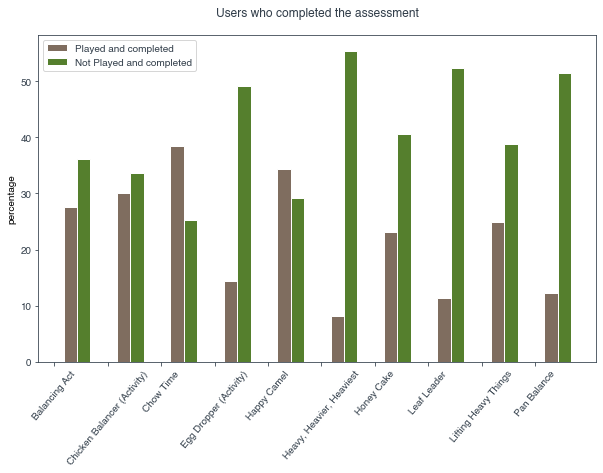

In [69]:
drawplot2(played,notplayed)